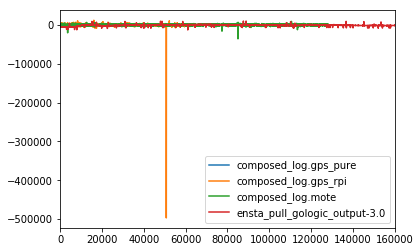

In [13]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import matplotlib

def load_data(file_name):
    df = pd.read_csv("Data/" + file_name + ".csv")
    try:
        df.drop(['accumulated_us'], axis=1, inplace=True)
    except:
        pass
    df.rename(columns={df.columns[0]: file_name}, inplace=True)
    
    df.columns
    
    return df

df1 = load_data("composed_log.gps_pure")
df2 = load_data("composed_log.gps_rpi")
df2 = df2.iloc[0:60000]
df3 = load_data("composed_log.mote")
# df3 = df3.iloc[0:5000]
df4 = load_data("ensta_pull_gologic_output-3.0")

df = pd.concat([df1, df2, df3, df4], axis=1)
df.head()

# df = df2

%matplotlib inline
df.plot()

In [14]:
df.count(axis=0)

composed_log.gps_pure            128162
composed_log.gps_rpi              60000
composed_log.mote                128162
ensta_pull_gologic_output-3.0    160236
dtype: int64

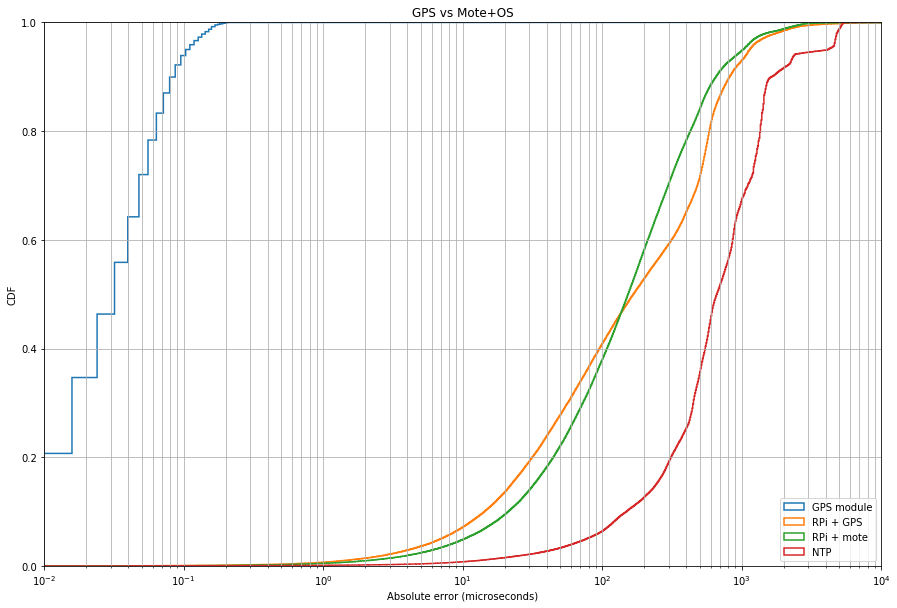

In [15]:
abs_delay = abs(df)

step = 10
# bins = list(np.arange(0,bin_limit,step))
bins = [0] + [10**x for x in np.arange(-3,4,0.005)]
    
if abs_delay.max().max() > bins[-1]:
    bins = bins + [abs_delay.max().max()/2, abs_delay.max().max()]
    
# bins = [0,10,20,100,1000000]
    
weights = abs_delay.div(abs_delay.sum(axis=0), axis=1)


plt.figure(figsize=(15,10))
plt.xscale("log")

for column in abs_delay.columns:
    data = abs_delay[column].dropna()  
    
    legend = {
        "composed_log.gps_pure": "GPS module",
        "composed_log.mote": "RPi + mote",
        "ensta_pull_gologic_output-3.0": "NTP",
        "composed_log.gps_rpi": "RPi + GPS"
    }
    
    _ = plt.hist(data, bins=bins, weights=np.ones_like(data)/data.count(), cumulative=True, histtype='step', fill=False, linewidth=1.5, alpha=1, label=legend[column])

# plt.xlim(50,10**4)
# plt.ylim(0.9,1)
plt.xlim(.01,10**4)
plt.ylim(0,1)
plt.xlabel("Absolute error (microseconds)")
plt.ylabel("CDF")
plt.title("GPS vs Mote+OS")
plt.legend(loc='lower right')

plt.grid(which="both")